In [2]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as mpimg
from PIL import Image
import os
import builtins
import numpy as np

carpeta_nombre ='D:/Machine/Tarea3/Nonsegmented'
X = []
Y = []

for file in glob.glob(f"{carpeta_nombre}/*/*"):
    if len(file.split("\\")) >= 2:
        nombre = file.split("\\")[-2]
        id = file.split("\\")[-1]
        img = Image.open(file).convert('L')  # Abre la imagen y la convierte a escala de grises
        img = img.resize((30, 30))  # Redimensiona la imagen a 30x30 píxeles
        X.append(np.array(img).flatten())
        Y.append(nombre)  # Añade la etiqueta de la clase (nombre de la carpeta)
        
X = np.array(X)
Y = np.array(Y)

In [5]:
X.shape

(5544, 900)

In [58]:
species_dict = {species: i for i, species in enumerate(set(Y))}
Y_numeric = [species_dict[species] for species in Y]
Y_numeric=np.array(Y_numeric)
Y_one_hot = to_categorical(Y_numeric)

In [65]:
pixeles=X.shape[1]

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model=Sequential()
model.add(Dense(5000,input_dim=pixeles,activation='relu'))
model.add(Dense(12,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X,Y_one_hot,epochs=100,batch_size=256,verbose=0)

In [78]:
history.history['loss']
history.history['accuracy']

[0.07972583174705505,
 0.06042568385601044,
 0.11489898711442947,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.12860749661922455,
 0.13455988466739655,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.1381673812866211,
 0.138167381286

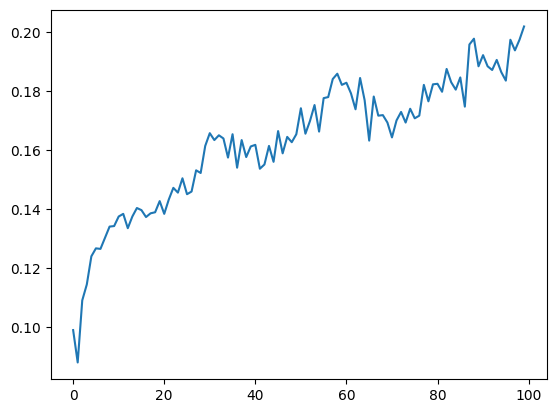

In [90]:
plt.plot(history.history['accuracy'])

Clasificacion con redes convulucionales

In [60]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as mpimg
from PIL import Image
import os
import builtins
import numpy as np

carpeta_nombre ='D:/Machine/Tarea3/Nonsegmented'
X = []
Y = []

for file in glob.glob(f"{carpeta_nombre}/*/*"):
    if len(file.split("\\")) >= 2:
        nombre = file.split("\\")[-2]
        id = file.split("\\")[-1]
        img = Image.open(file).convert("L")  # Abre la imagen
        img = img.resize((30, 30))  # Redimensiona la imagen a 30x30 píxeles
        X.append(np.array(img))
        Y.append(nombre)  # Añade la etiqueta de la clase (nombre de la carpeta)
        
X_train = np.array(X)
Y_train = np.array(Y)

In [63]:
from keras.utils import to_categorical
species_dict = {species: i for i, species in enumerate(set(Y_train))}
Y_numeric = [species_dict[species] for species in Y]
Y_numeric=np.array(Y_numeric)
Y_one_hot = to_categorical(Y_numeric)

In [149]:
species_dict

{'Sugar beet': 0,
 'Loose Silky-bent': 1,
 'Fat Hen': 2,
 'Black-grass': 3,
 'Cleavers': 4,
 'Shepherd’s Purse': 5,
 'Scentless Mayweed': 6,
 'Small-flowered Cranesbill': 7,
 'Maize': 8,
 'Common wheat': 9,
 'Charlock': 10,
 'Common Chickweed': 11}

In [84]:
from keras.models import Sequential
from keras import layers
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(30,30,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(96,(3,3),activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(5000,activation='relu'))
model.add(layers.Dense(12,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(X_train,Y_one_hot,epochs=20,batch_size=128,verbose=0)

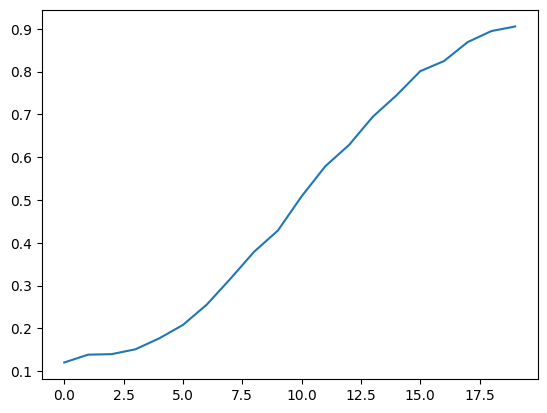

In [85]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [152]:
print(f"accuracy: {history.history['accuracy'][-1]*100}")

accuracy: 90.53030014038086


In [121]:
carpeta="D:/Machine/Tarea3/test"
X_test = []
id_list=[]
for file in glob.glob(f"{carpeta}/*/*"):
    if len(file.split("\\")) >= 2:
        id = file.split("\\")[-1]
        id_list.append(id)
        img = Image.open(file).convert("L")  # Abre la imagen
        img = img.resize((30, 30))  # Redimensiona la imagen a 30x30 píxeles
        X_test.append(np.array(img))
X_test = np.array(X_test)

In [122]:
predicciones=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [123]:
numeros=np.argmax(predicciones,axis=1)

In [124]:
def find_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None  # Si el valor no se encuentra en el diccionario

In [125]:
especies_test=[find_key_by_value(species_dict,numero)for numero in numeros]

In [126]:
Y_test=np.array(especies_test)

In [128]:
id_list=np.array(id_list)

In [130]:
resultado=[id_list,Y_test]

In [131]:
resultado=np.array(resultado)

In [133]:
resultado=resultado.T

In [136]:
import pandas as pd
resultado=pd.DataFrame(resultado,columns=["file","species"])

In [148]:
resultado.to_csv('D:/Machine/Tarea3/testing.csv',index=False)